In [ ]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import demoji
import spacy
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv('emails.csv')
print(df.head())
print("\nDescribing the data")
print(df.describe())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Describing the data
              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [ ]:
#Q1
import pandas as pd
import re
from collections import defaultdict
import math

data = pd.read_csv("emails.csv")
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    return tokens

data['text'] = data['text'].apply(preprocess)

# Separate data into positive and negative classes
positive_data = data[data['spam'] == 'positive']
negative_data = data[data['spam'] == 'negative']

# Calculate class priors
total_docs = len(data)
prior_positive = len(positive_data) / total_docs
prior_negative = len(negative_data) / total_docs

vocabulary = set()
for tokens in data['text']:
    vocabulary.update(tokens)
positive_word_counts = defaultdict(int)
negative_word_counts = defaultdict(int)
for tokens in positive_data['text']:
    for token in tokens:
        positive_word_counts[token] += 1

for tokens in negative_data['text']:
    for token in tokens:
        negative_word_counts[token] += 1

# Function to calculate class likelihood
def calculate_likelihood(tokens, word_counts, total_count):
    likelihood = 1.0
    for token in tokens:
        likelihood *= (word_counts[token] + 1) / (total_count + len(vocabulary))
    return likelihood

# Classify a new email
def classify_email(email_text):
    tokens = preprocess(email_text)

    positive_likelihood = calculate_likelihood(tokens, positive_word_counts, len(positive_data))
    negative_likelihood = calculate_likelihood(tokens, negative_word_counts, len(negative_data))

    posterior_positive = prior_positive * positive_likelihood
    posterior_negative = prior_negative * negative_likelihood

    if posterior_positive > posterior_negative:
        return 'positive'
    else:
        return 'negative'

# Test the classifier on a new email
new_email = "I'm very happy with your service"
classification = classify_email(new_email)
print(f"Classification: {classification}")



Classification: negative


In [ ]:
#Q2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X = df['text']
y = df['spam']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)
y_pred = naive_bayes_classifier.predict(X_valid_tfidf)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_valid, y_pred))


Accuracy: 0.8507462686567164
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       843
           1       1.00      0.43      0.60       296

    accuracy                           0.85      1139
   macro avg       0.92      0.71      0.75      1139
weighted avg       0.88      0.85      0.83      1139



In [ ]:
#Q3
from collections import Counter
import string
def extract_text_features(text):
    # 1. Length of text
    text_length = len(text)

    # 2. Average word length
    words = text.split()
    avg_word_length = sum(len(word) for word in words) / len(words) if len(words) > 0 else 0

    # 3. Number of capital letters
    capital_count = sum(1 for char in text if char.isupper())

    # 4. Punctuation count
    punctuation_count = sum(1 for char in text if char in string.punctuation)

    # 5. Number of numerals
    numeral_count = sum(1 for char in text if char.isdigit())

    # 6. Frequency of top words
    top_words = ["the", "and", "to", "of", "a"]
    word_frequency = Counter(words)
    top_word_frequency = sum(word_frequency[word] for word in top_words)

    return [text_length, avg_word_length, capital_count, punctuation_count, numeral_count, top_word_frequency]
df['text_features'] = df['text'].apply(extract_text_features)
print(df['text_features'][0])

[1348, 5.328042328042328, 0, 0, 3, 23]


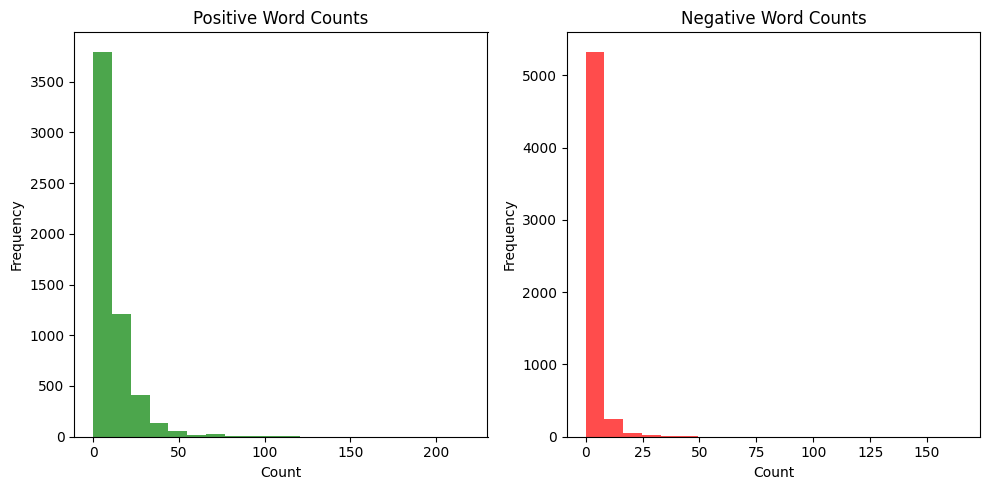

In [ ]:
#Q4
from nltk.sentiment import SentimentIntensityAnalyzer
def count_positive_negative_words(sentence):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(sentence)
    num_positive_words = len([word for word in sentence.split() if sia.polarity_scores(word)["compound"] > 0])
    num_negative_words = len([word for word in sentence.split() if sia.polarity_scores(word)["compound"] < 0])
    return num_positive_words, num_negative_words

df['num_positive_words'], df['num_negative_words'] = zip(*df['text'].apply(count_positive_negative_words))

import matplotlib.pyplot as plt
# Create histograms for positive and negative word counts
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['num_positive_words'], bins=20, color='green', alpha=0.7)
plt.title('Positive Word Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['num_negative_words'], bins=20, color='red', alpha=0.7)
plt.title('Negative Word Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#Q5
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df['text']
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Implement L1 (Lasso) regularization
logistic_l1 = LogisticRegression(penalty='l1', solver='saga', C=1.0)
logistic_l1.fit(X_train_tfidf, y_train)
y_pred_l1 = logistic_l1.predict(X_test_tfidf)

# Implement L2 (Ridge) regularization
logistic_l2 = LogisticRegression(penalty='l2', C=1.0)
logistic_l2.fit(X_train_tfidf, y_train)
y_pred_l2 = logistic_l2.predict(X_test_tfidf)

# Evaluate L1 regularization model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("Accuracy (L1):", accuracy_l1)
print("Classification Report (L1):\n", classification_report(y_test, y_pred_l1))

# Evaluate L2 regularization model
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy (L2):", accuracy_l2)
print("Classification Report (L2):\n", classification_report(y_test, y_pred_l2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy (L1): 0.9692712906057945
Classification Report (L1):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       843
           1       0.95      0.93      0.94       296

    accuracy                           0.97      1139
   macro avg       0.96      0.96      0.96      1139
weighted avg       0.97      0.97      0.97      1139

Accuracy (L2): 0.9789288849868305
Classification Report (L2):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       843
           1       1.00      0.92      0.96       296

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139

